# Game Cover Comparison

### Use case:
We have a photo of a video game box and want to identify the same (or similar) covers from a pool of cover images.

### Goal: 
Test different image similarity measures.

In [1]:
import cv2
import os
from skimage.measure import compare_ssim as ssim
from IPython.display import Image, display
from matplotlib import pyplot as plt
%matplotlib inli

In [2]:
#use to identify keypoint features
ORB = cv2.ORB_create()

### Image similarity measures

In [3]:
class ImageMatcher:
    """
    Provides different similarity measures for two images
    (ImageData instances)
    """
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    
    @staticmethod
    def ssim(img_a, img_b):
        return ssim(img_a.std, img_b.std)
    
    @staticmethod
    def sift(img_a, img_b):
        matches = ImageMatcher.bf.match(img_a.desc, img_b.desc)
        similar_regions = [i for i in matches if i.distance < 70]
        if len(matches) == 0:
            return 0
        return len(similar_regions) / len(matches)

### Util classes

In [4]:
class ImageData:
    """
    Contains original image data, processed image data,
    and image keypoint features
    """
    
    def __init__(self, filepath):
        
        self.filepath = filepath
        self.original = cv2.imread(filepath)
        self.std = cv2.resize(self.original, (1000, 1000))
        self.std = cv2.cvtColor(self.std, cv2.COLOR_BGR2GRAY)
        self.keypoints, self.desc = ORB.detectAndCompute(self.std, None)
        
    def show(self):
        display(Image(self.filepath, width=200))

In [5]:
class ImageCorpus:
    """
    Manages an image corpus. 
    Provides find_similar function for finding similar image.
    """    
    
    def __init__(self, directory):
        self._corpus = []
        for filename in os.listdir(directory):
            self.add(os.path.join(directory, filename))
    
    def add(self, filepath):
        self._corpus.append(ImageData(filepath))
        
    def __iter__(self):
        for image in self._corpus:
            yield image
    
    def __len__(self):
        return len(self._corpus)
    
    def find_similar(self, image, top_n=5):
        results = []
        #use sift similarity measure
        cmp = ImageMatcher.sift
        for i, img in enumerate(self._corpus):
            score = cmp(test, img)
            results.append([img, score])
        results = sorted(results, key=lambda x: x[1], reverse=True)
        for i in range(top_n):
            result = results[i]
            print("Similarity: {}".format(result[1]))
            result[0].show()

## Load corpus

In [6]:
#load corpus
corpus = ImageCorpus("cover-images/")
len(corpus)

10

### Examples

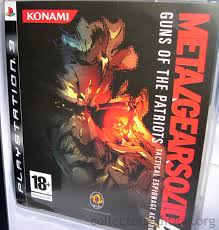

In [7]:
#load test cover
test = ImageData("cover-tests/mgs4-2.jpg")
test.show()

Similarity: 0.9666666666666667


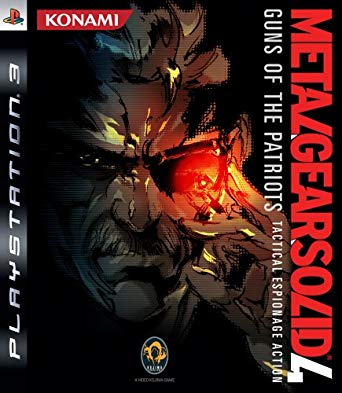

Similarity: 0.8819444444444444


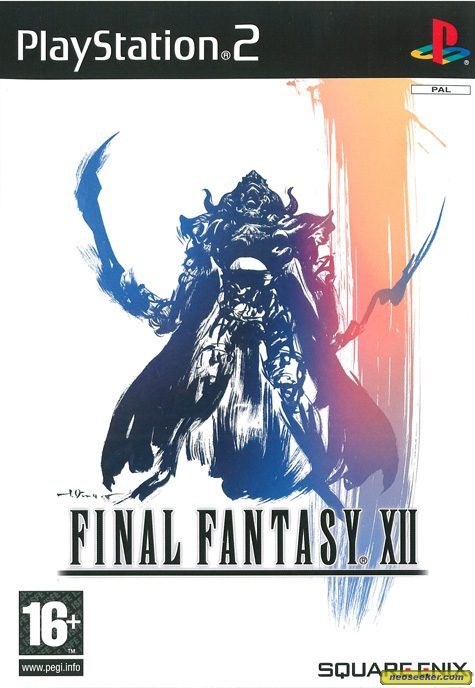

Similarity: 0.88


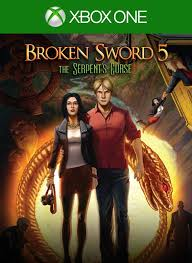

In [8]:
#find similar covers
corpus.find_similar(test, top_n=3)

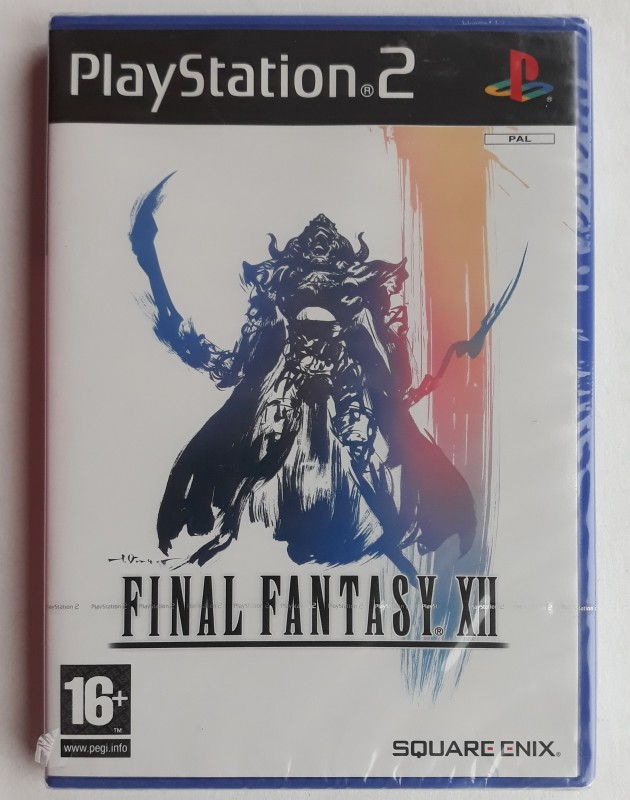

In [9]:
#another test
#load test image 
test = ImageData("cover-tests/ffxii.jpg")
test.show()

Similarity: 0.9863636363636363


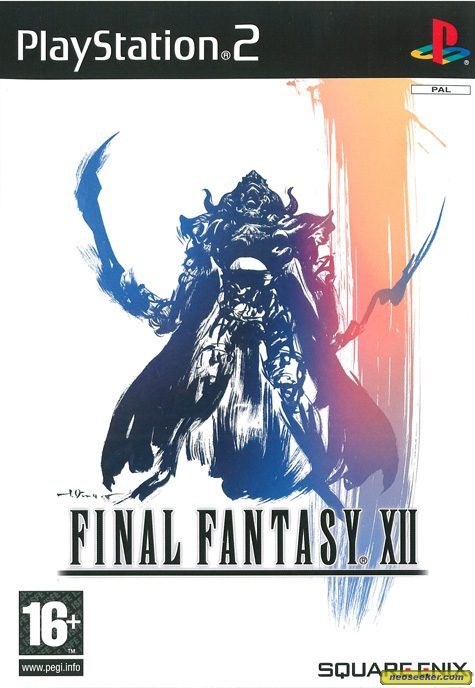

Similarity: 0.9559748427672956


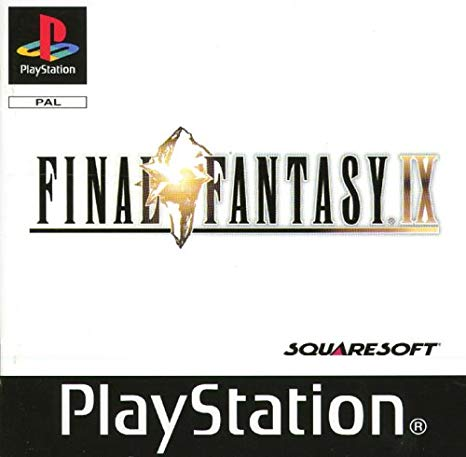

Similarity: 0.9507042253521126


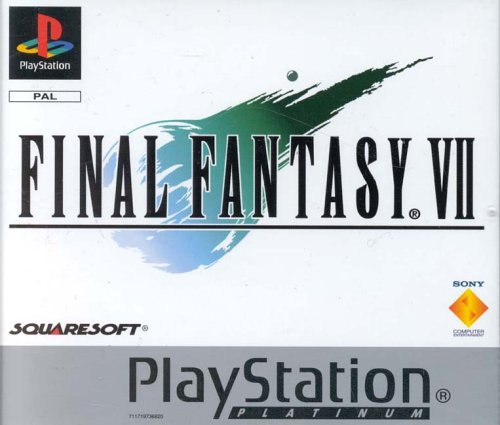

In [10]:
corpus.find_similar(test, top_n=3)

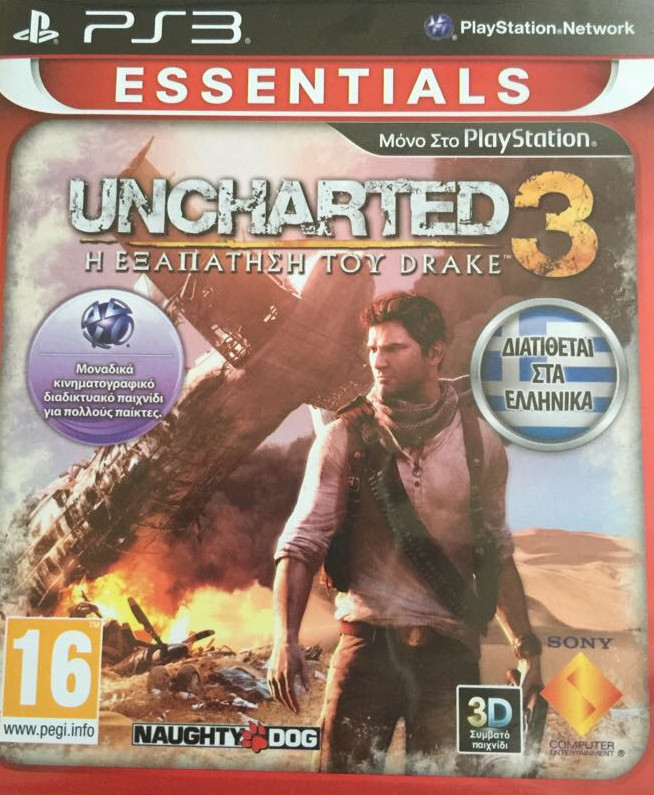

In [11]:
test = ImageData("cover-tests/uncharted3.jpg")
test.show()

Similarity: 0.7333333333333333


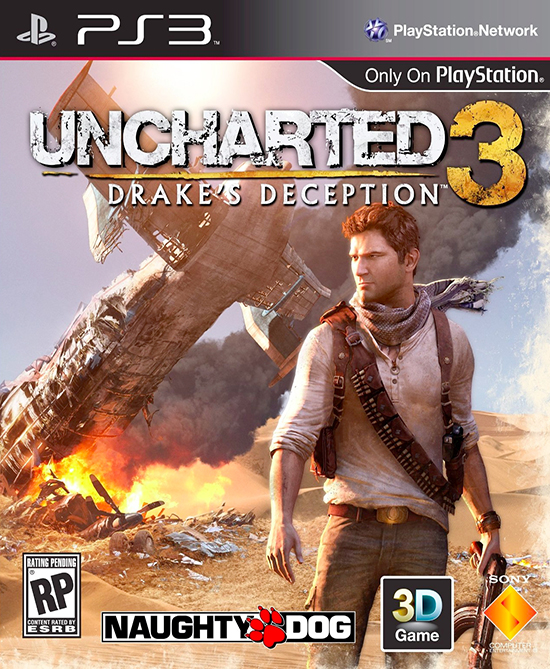

Similarity: 0.7235294117647059


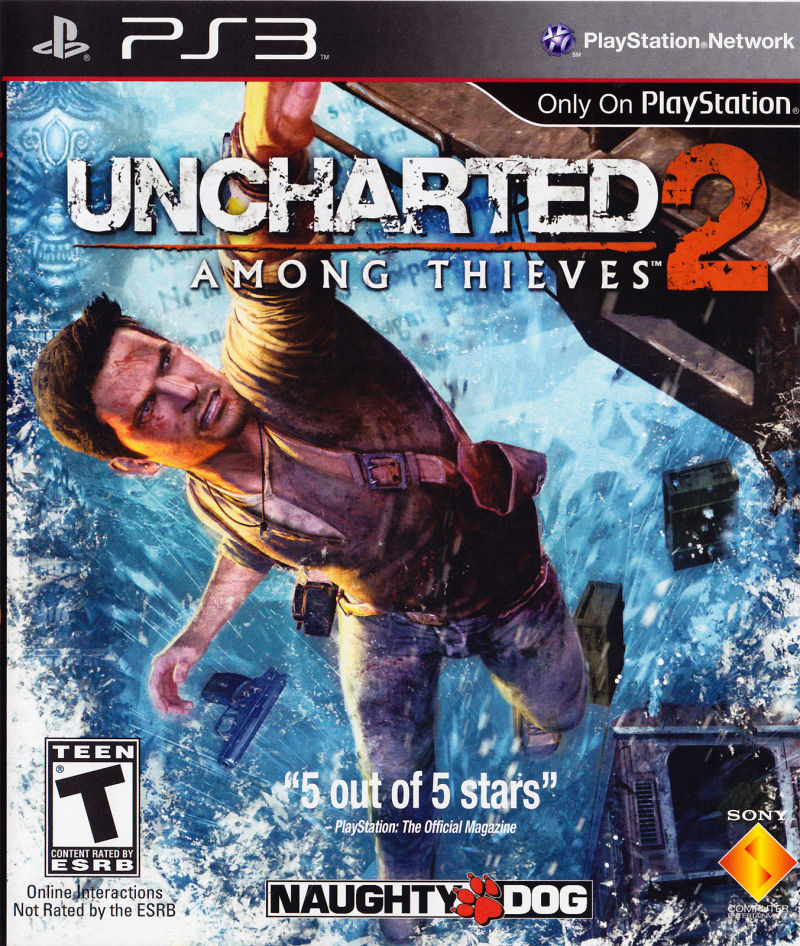

Similarity: 0.7112676056338029


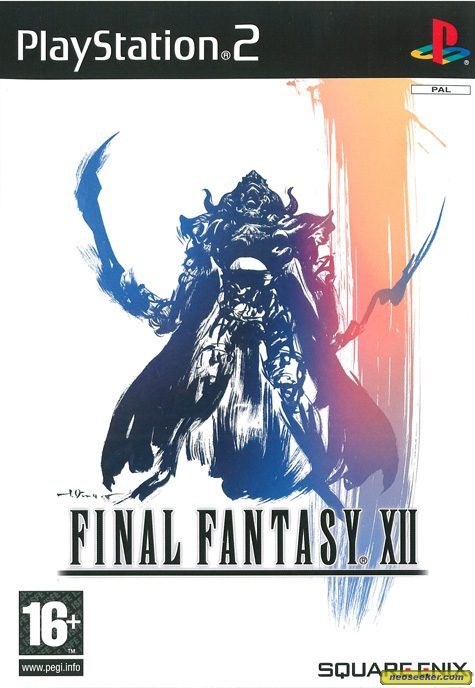

In [12]:
corpus.find_similar(test, top_n=3)